In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('grains.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df['target'].value_counts()

2    70
1    70
0    70
Name: target, dtype: int64

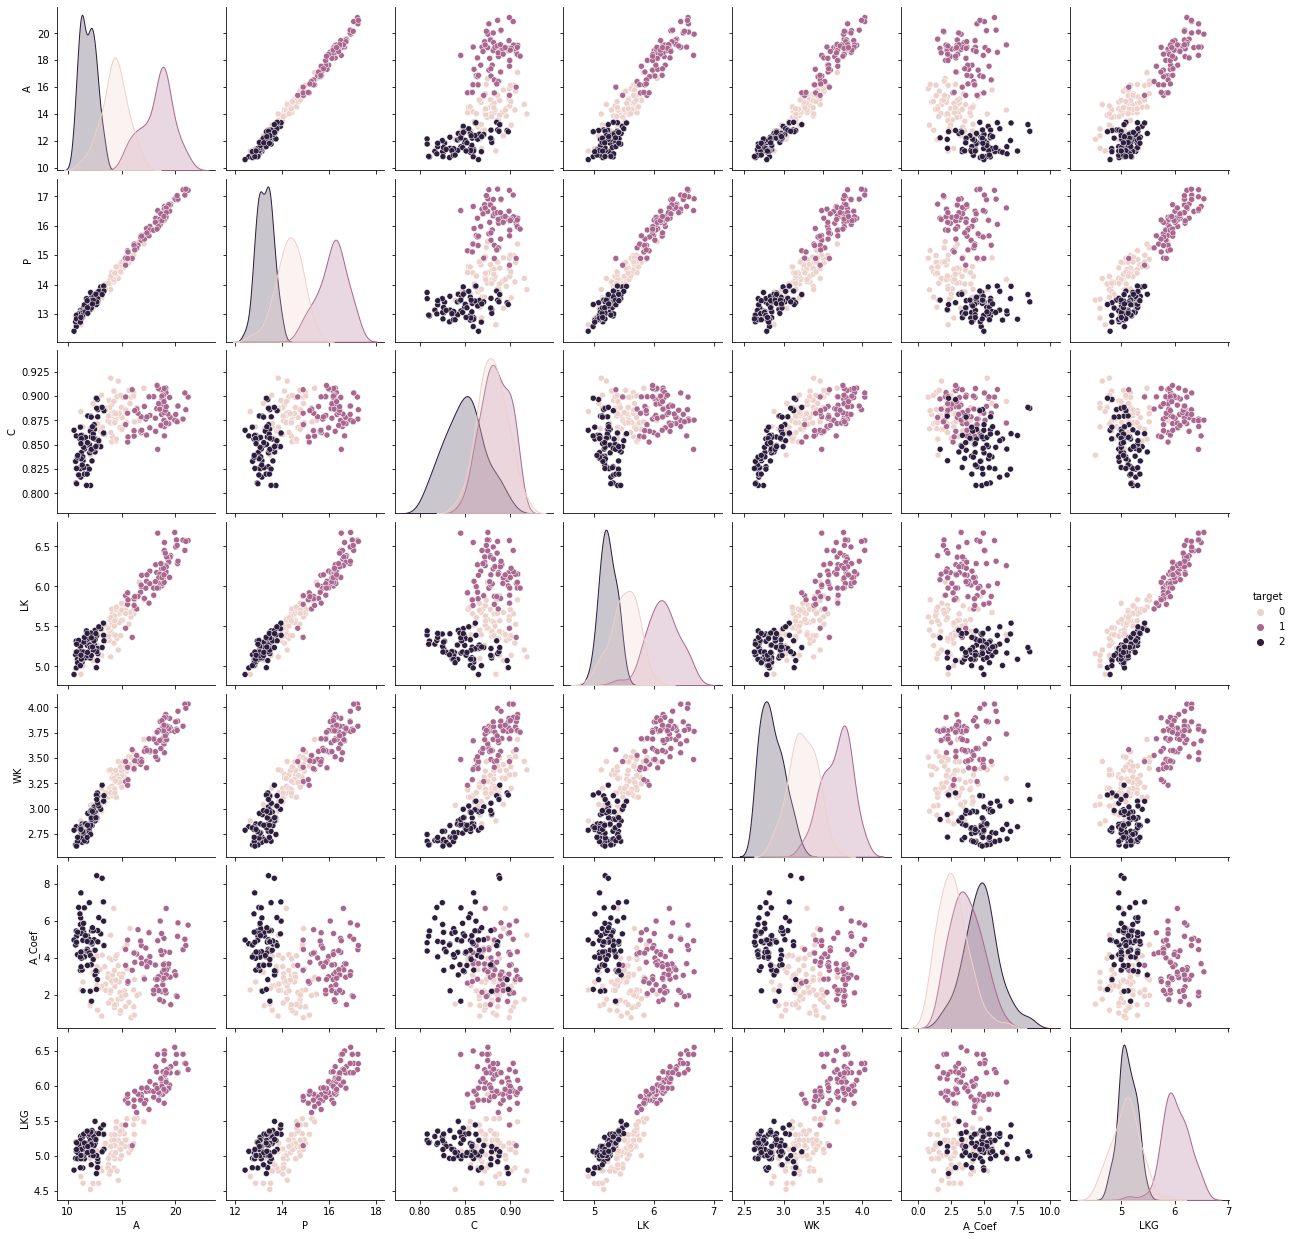

In [4]:
sns.pairplot(df,hue='target')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cl=df.drop('target',axis=1)
cls=ss.fit_transform(cl)

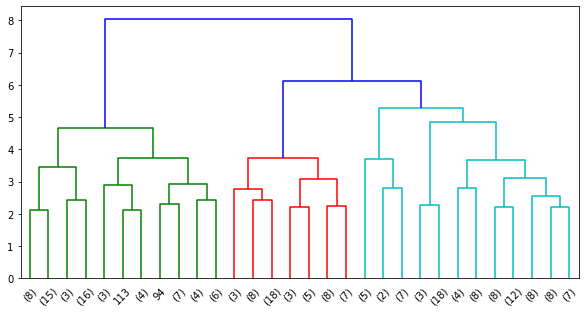

In [8]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
plt.figure(figsize=(10,5))
mergings=linkage(cls,method='complete',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [10]:
cluster_cut=pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1,))
df['cluster']=cluster_cut

In [11]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0


In [12]:
pd.crosstab(df['target'],df['cluster'])

cluster,0,1,2
target,,,
0,48,2,20
1,4,66,0
2,0,0,70


kMeans Cluster Analysis

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
ssd=[]
sscore=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)
    ss=silhouette_score(cls,kmeans.labels_)
    sscore.append(ss)

<function matplotlib.pyplot.show(*args, **kw)>

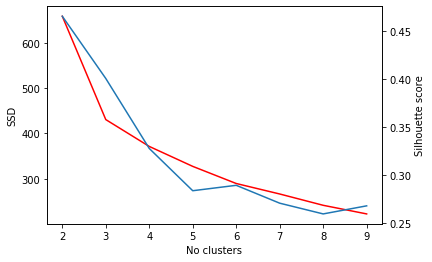

In [21]:
fig,ax=plt.subplots()
ax.plot(range(2,10),ssd,'r')
ax.set_xlabel('No clusters')
ax.set_ylabel('SSD')
ax1=ax.twinx()
ax1.plot(range(2,10),sscore)
ax1.set_ylabel('Silhouette score')
plt.show

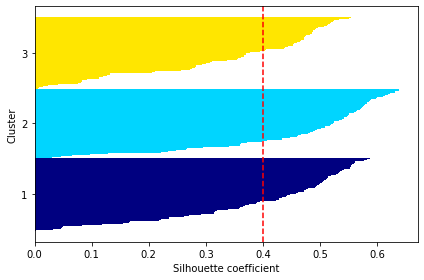

In [22]:
import plusmodules as pm
pm.svisualizer(cls,3)

### DBSCAN

In [3]:
df2=pd.read_csv('cpu_utilization.csv')

In [4]:
df2.head()

,timestamp,value
0,2014-04-10 00:04:00,91.958
1,2014-04-10 00:09:00,94.798
2,2014-04-10 00:14:00,92.208
3,2014-04-10 00:19:00,93.722
4,2014-04-10 00:24:00,93.042


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
timestamp    4032 non-null object
value        4032 non-null float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [6]:
df2['date']=df2['timestamp'].apply(pd.to_datetime)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 3 columns):
timestamp    4032 non-null object
value        4032 non-null float64
date         4032 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 94.6+ KB


In [8]:
df2['hour']=df2['date'].dt.hour

C:\Users\shriya bittu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


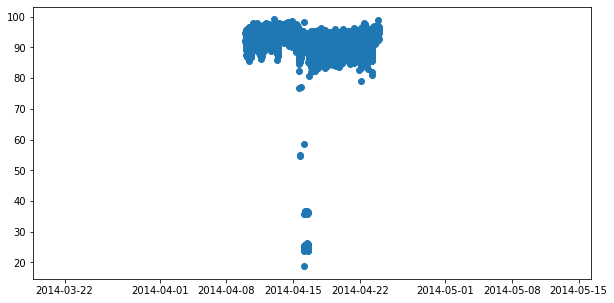

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df2['date'],df2['value'])
plt.show()

C:\Users\shriya bittu\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


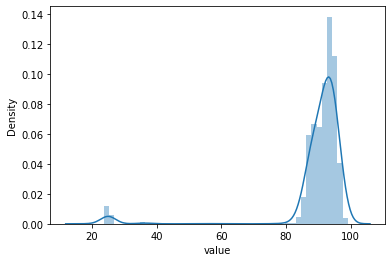

In [10]:
sns.distplot(df2['value'])
plt.show()

In [11]:
dfc=df2[['hour','value']]

In [12]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfcs=ss.fit_transform(dfc)

In [13]:
dfcs

array([[-1.66002734,  0.17940714],
       [-1.66002734,  0.41456079],
       [-1.66002734,  0.20010729],
       ...,
       [ 1.66174668,  0.54505451],
       [-1.66002734,  0.43476413],
       [-1.66002734,  0.56244263]])

In [14]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=4)
dbscan.fit(dfcs)

DBSCAN(min_samples=4)

In [15]:
lbl=pd.Series(dbscan.labels_)
lbl.value_counts()

 0    3900
 1     118
 2      11
-1       3
dtype: int64

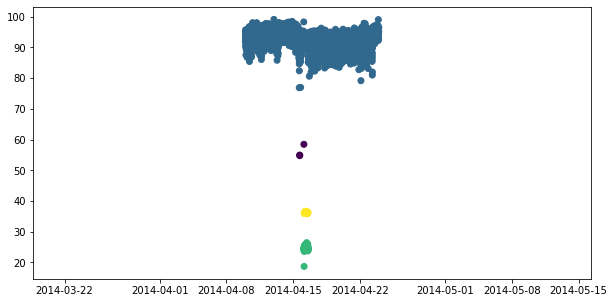

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(df2['date'],df2['value'],c=dbscan.labels_)
plt.show()

### Tuning for optimal eps

In [17]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=4)
nn.fit(dfcs)

distances,indices=nn.kneighbors(dfcs)

In [18]:
distances

array([[0.        , 0.0004968 , 0.00132481, 0.00347762],
       [0.        , 0.00298082, 0.00397443, 0.01258569],
       [0.        , 0.0006624 , 0.00347762, 0.00678965],
       ...,
       [0.        , 0.00331202, 0.00927367, 0.01109528],
       [0.        , 0.00347762, 0.00761765, 0.01026727],
       [0.        , 0.        , 0.00678965, 0.01043287]])

In [19]:
distances=np.mean(distances,axis=1)


In [20]:
distances

array([0.00132481, 0.00488523, 0.00273242, ..., 0.00592024, 0.00534064,
       0.00430563])

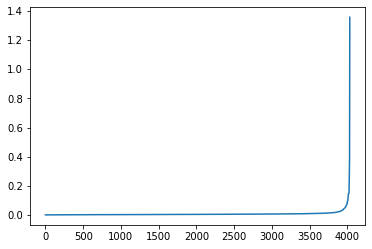

In [21]:
distances=np.sort(distances,axis=0)
plt.plot(distances)
plt.show()

In [22]:
distances.shape

(4032,)

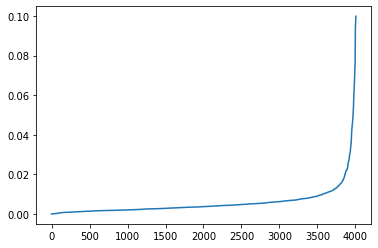

In [23]:
dis=pd.Series(distances)
dis=dis.loc[dis<0.1]
plt.plot(dis)
plt.show()

In [24]:
dbscan=DBSCAN(eps=0.02,min_samples=4)
dbscan.fit(dfcs)

DBSCAN(eps=0.02, min_samples=4)

In [25]:
lbl=pd.Series(dbscan.labels_)
lbl.value_counts()

-1      303
 1      122
 51     118
 50     115
 52     114
       ... 
 151      4
 114      4
 92       4
 148      4
 152      3
Length: 157, dtype: int64

In [27]:
lbl=pd.Series(dbscan.labels_)
lbl.loc[lbl>=0]=0
lbl.value_counts()

 0    3729
-1     303
dtype: int64

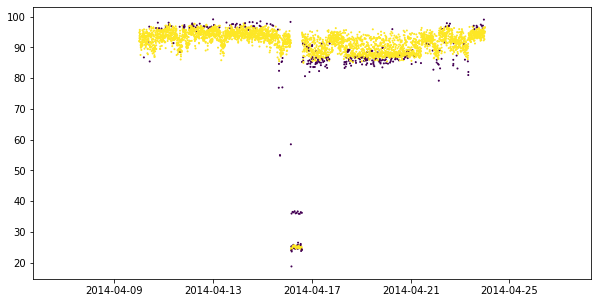

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(df2['date'],df2['value'],c=lbl,s=1)
plt.show()

### Dimension reduction(PCA)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df2=pd.read_csv('steel_fault.csv')
df2=df2.sample(frac=1,random_state=4).reset_index(drop=True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
0,581,652,148364,148463,3187,208,198,336567,87,127,...,0.2828,-0.1750,1.0000,0,0,0,0,0,1,1
1,41,212,2609514,2609580,5951,302,136,617708,38,124,...,-0.6140,-0.1891,1.0000,0,0,0,0,0,0,2
2,1614,1638,676623,676657,655,33,35,49303,54,93,...,0.2941,-0.4119,0.9685,0,0,1,0,0,0,1
3,391,420,1312199,1312217,129,48,35,16308,112,150,...,-0.3793,-0.0124,0.8123,0,0,0,0,0,1,1
4,832,848,712437,712446,67,29,12,8140,102,141,...,-0.4375,-0.0508,0.2583,0,0,0,0,0,0,2


In [6]:
df2['Class'].value_counts()

1    1268
2     673
Name: Class, dtype: int64

In [7]:
df2['Class']=df2['Class']-1

In [8]:
df2['Class'].value_counts()

0    1268
1     673
Name: Class, dtype: int64

In [9]:
df2['Class'].value_counts(normalize=True)

0    0.653272
1    0.346728
Name: Class, dtype: float64

C:\Users\shriya bittu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-0.05, 1269, '0.65')

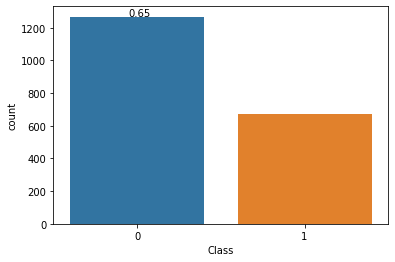

In [10]:
sns.countplot(df2['Class'])
plt.text(x=-0.05,y=df2['Class'].value_counts()[0]+1,s=round(df2['Class'].value_counts(normalize=True)[0],2))


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

In [12]:
df2.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,Class
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
cols=df2.columns
dum_cols=[]
for i in cols:
    if df2[i].nunique()==2:
        dum_cols.append(i)
        print(i)
        print(df2[i].value_counts())
print(dum_cols)

V12
0    1164
1     777
Name: V12, dtype: int64
V13
1    1164
0     777
Name: V13, dtype: int64
V28
0    1783
1     158
Name: V28, dtype: int64
V29
0    1751
1     190
Name: V29, dtype: int64
V30
0    1550
1     391
Name: V30, dtype: int64
V31
0    1869
1      72
Name: V31, dtype: int64
V32
0    1886
1      55
Name: V32, dtype: int64
V33
0    1539
1     402
Name: V33, dtype: int64
Class
0    1268
1     673
Name: Class, dtype: int64
['V12', 'V13', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'Class']


In [15]:
y=df2['Class']
X=df2.drop(dum_cols,axis=1)

In [16]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27
0,581,652,148364,148463,3187,208,198,336567,87,127,...,0.0544,0.3413,0.5000,1.0,3.5034,1.8513,1.9956,0.2828,-0.1750,1.0000
1,41,212,2609514,2609580,5951,302,136,617708,38,124,...,0.1261,0.5662,0.4853,0.0,3.7746,2.2330,1.8195,-0.6140,-0.1891,1.0000
2,1614,1638,676623,676657,655,33,35,49303,54,93,...,0.0142,0.7273,0.9714,1.0,2.8162,1.3802,1.5315,0.2941,-0.4119,0.9685
3,391,420,1312199,1312217,129,48,35,16308,112,150,...,0.0212,0.6042,0.5143,0.0,2.1106,1.4624,1.2553,-0.3793,-0.0124,0.8123
4,832,848,712437,712446,67,29,12,8140,102,141,...,0.0095,0.5517,0.7500,0.0,1.8261,1.2041,0.9542,-0.4375,-0.0508,0.2583


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=10)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrains=ss.fit_transform(xtrain)
xtests=ss.transform(xtest)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [20]:
rfc=RandomForestClassifier(random_state=4)
rfc.fit(xtrains,ytrain)
y_train_pred=rfc.predict(xtrains)
y_train_prob=rfc.predict_proba(xtrains)[:,1]

y_test_pred=rfc.predict(xtest)
y_test_prob=rfc.predict_proba(xtest)[:,1]

print('TRain -Accuracy',accuracy_score(ytrain,y_train_pred))
print('Train-AUC',roc_auc_score(ytrain,y_train_prob),'\n')

print('Test -Accuracy',accuracy_score(ytest,y_test_pred))
print('Test-AUC',roc_auc_score(ytest,y_test_prob))

TRain -Accuracy 1.0
Train-AUC 1.0 

Test -Accuracy 0.35334476843910806
Test-AUC 0.6069996916435398


#### Tuning RandomForestClassifier

In [21]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [22]:
#tuning using randomized classifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


rfc=RandomForestClassifier(random_state=4)


tuned_param={'n_estimators':sp_randint(50,250),
            'max_features':sp_randint(1,25),
            'min_samples_leaf':sp_randint(1,50),
            'criterion':['entropy','gain'],
            'max_depth':sp_randint(2,10)}

random_model=RandomizedSearchCV(rfc,tuned_param,scoring='roc_auc',random_state=4,n_iter=3,cv=3)
random_model.fit(xtrains,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=3,
                   param_distributions={'criterion': ['entropy', 'gain'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169FAD58308>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169F8ADBAC8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169FAB761C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169FAD46C88>},
                   random_state=4, scoring='roc_auc')

In [26]:
#tuning using randomised classifier and pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.pipeline import Pipeline

#pipeline would ensure that inside the CV framework,it will standardize 
#the train section and transfer mu and sigma for standardizing test section.

model=Pipeline([('ss',StandardScaler()),
               ('rfc',RandomForestClassifier(random_state=4))])


tuned_param={'rfc__n_estimators':sp_randint(50,250),
            'rfc__max_features':sp_randint(1,25),
            'rfc__min_samples_leaf':sp_randint(1,50),
            'rfc__criterion':['entropy','gain'],
            'rfc__max_depth':sp_randint(2,10)}

random_model=RandomizedSearchCV(model,tuned_param,scoring='roc_auc',random_state=4,n_iter=50,cv=3)
random_model.fit(X,y)

C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dis

KeyboardInterrupt: 

In [ ]:
random_model.best_params_

In [ ]:
#to know wt combinations it used
pd.DataFrame(random_model.cv_results_).iloc[:,4:].head()

In [ ]:
best_params={'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 24,
 'min_samples_leaf': 6,
 'n_estimators': 179}

In [ ]:
rfc=RandomForestClassifier(**best_params,random_state=4)
rfc.fit(xtrains,ytrain)
y_train_pred=rfc.predict(xtrains)
y_train_prob=rfc.predict_proba(xtrains)[:,1]

y_test_pred=rfc.predict(xtest)
y_test_prob=rfc.predict_proba(xtest)[:,1]

print('TRain -Accuracy',accuracy_score(ytrain,y_train_pred))
print('Train-AUC',roc_auc_score(ytrain,y_train_prob),'\n')

print('Test -Accuracy',accuracy_score(ytest,y_test_pred))
print('Test-AUC',roc_auc_score(ytest,y_test_prob))

### Creating principal components and building model

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

In [ ]:
pca.fit(xtrains)

In [ ]:
pcs=['PC'+str(i) for i in range(1,26)]
pcs

In [ ]:
# Eigenvalues
pca.explained_variance_
plt.figure(figsize=(10,5))
plt.bar(pcs,pca.explained_variance_)
plt.ylabel('Eigen values')
plt.xlabel('Principal components')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#ratios of each pc
pca.explained_variance_ratio_

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

Note:we can see that,16 principal components(PC's) are accounting for 99% of variation in the data.Hence we ll consider 16 components for further analysis

In [ ]:
pca=PCA(n_components=16)
pca.fit(xtrains)

In [ ]:
##Eigen Vector

pca.components_.shape


In [ ]:
pcs=['PC'+str(i) for i in range(1,17)]
pd.DataFrame(pca.components_.T,index=xtrain.columns,columns=pcs)

In [ ]:
x_train_pc=pca.fit_transform(xtrains)
x_test_pc=pca.transform(xtests)

print(x_train_pc.shape)
print(x_test_pc.shape)

In [ ]:
rfc=RandomForestClassifier(random_state=4)
rfc.fit(x_train_pc,ytrain)
y_train_pred=rfc.predict(x_train_pc)
y_train_prob=rfc.predict_proba(x_train_pc)[:,1]

y_test_pred=rfc.predict(x_test_pc)
y_test_prob=rfc.predict_proba(x_test_pc)[:,1]

print('TRain -Accuracy',accuracy_score(ytrain,y_train_pred))
print('Train-AUC',roc_auc_score(ytrain,y_train_prob),'\n')

print('Test -Accuracy',accuracy_score(ytest,y_test_pred))
print('Test-AUC',roc_auc_score(ytest,y_test_prob))

#### Tuning Random forest classifier using principal components

In [ ]:
model=Pipeline([('ss',StandardScaler()),
                ('pca',PCA(n_components=16)),
               ('rfc',RandomForestClassifier(random_state=4))])


tuned_param={'rfc__n_estimators':sp_randint(50,250),
            'rfc__max_features':sp_randint(1,16),
            'rfc__min_samples_leaf':sp_randint(1,50),
            'rfc__criterion':['entropy','gain'],
            'rfc__max_depth':sp_randint(2,10)}

random_model=RandomizedSearchCV(model,tuned_param,scoring='roc_auc',random_state=4,n_iter=50,cv=3)
random_model.fit(X,y)

In [ ]:
random_model.best_params_

In [ ]:
best_params={'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 9,
 'min_samples_leaf': 1,
 'n_estimators': 147}

In [ ]:
rfc=RandomForestClassifier(**best_params,random_state=4)
rfc.fit(x_train_pc,ytrain)
y_train_pred=rfc.predict(x_train_pc)
y_train_prob=rfc.predict_proba(x_train_pc)[:,1]

y_test_pred=rfc.predict(x_test_pc)
y_test_prob=rfc.predict_proba(x_test_pc)[:,1]

print('TRain -Accuracy',accuracy_score(ytrain,y_train_pred))
print('Train-AUC',roc_auc_score(ytrain,y_train_prob),'\n')

print('Test -Accuracy',accuracy_score(ytest,y_test_pred))
print('Test-AUC',roc_auc_score(ytest,y_test_prob))

In [ ]:
#to know wt combinations it used
cvr=pd.DataFrame(random_model.cv_results_).iloc[:,4:]
cvr=cvr.sort_values(by='rank_test_score')

In [ ]:
cvr.head()

### Applying svd for creating components

In [ ]:
from sklearn.decomposition import TruncatedSVD

 The algorithm is called truncated SVD because  the number of components it creates is equal to number of features-1

In [24]:
svd=TruncatedSVD(n_components=24,random_state=4)
svd.fit(xtrains)

TruncatedSVD(n_components=24, random_state=4)

In [25]:
svd.explained_variance_

array([8.00120547e+00, 3.40308974e+00, 2.42823338e+00, 2.29559836e+00,
       1.81588752e+00, 1.58321997e+00, 1.01627130e+00, 9.08127873e-01,
       8.27363068e-01, 7.46853952e-01, 6.10928909e-01, 3.95802892e-01,
       2.99707270e-01, 2.32937524e-01, 1.89466233e-01, 8.49013726e-02,
       5.71981906e-02, 5.30976778e-02, 3.26684472e-02, 1.09455687e-02,
       5.13412277e-03, 9.09766162e-04, 4.39422932e-04, 1.19632670e-05])

In [28]:
pcs=['PC'+str(i) for i in range(1,25)]


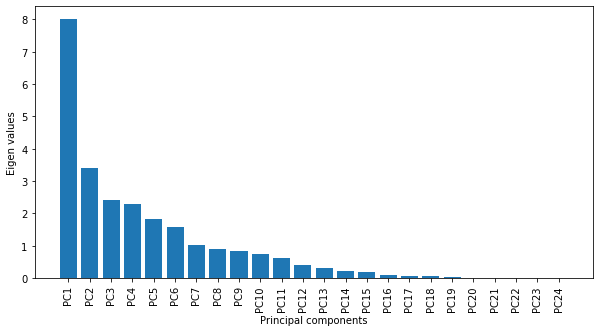

In [29]:
svd.explained_variance_
plt.figure(figsize=(10,5))
plt.bar(pcs,svd.explained_variance_)
plt.ylabel('Eigen values')
plt.xlabel('Principal components')
plt.xticks(rotation=90)
plt.show()

In [30]:
np.cumsum(svd.explained_variance_ratio_)

array([0.32004822, 0.45617181, 0.55330114, 0.64512508, 0.71776058,
       0.78108938, 0.82174023, 0.85806534, 0.89115987, 0.92103403,
       0.94547118, 0.9613033 , 0.97329159, 0.98260909, 0.99018774,
       0.99358379, 0.99587172, 0.99799563, 0.99930237, 0.99974019,
       0.99994555, 0.99998194, 0.99999952, 1.        ])

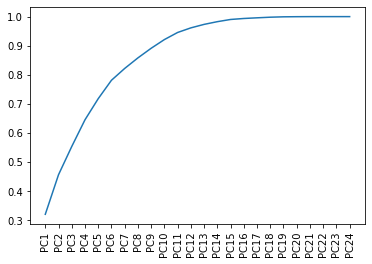

In [34]:
plt.plot(pcs,np.cumsum(svd.explained_variance_ratio_))
plt.xticks(rotation=90)
plt.show()

In [35]:
svd=TruncatedSVD(n_components=16,random_state=4)

x_train_pc=svd.fit_transform(xtrains)
x_test_pc=svd.transform(xtests)

In [36]:
rfc=RandomForestClassifier(random_state=4)
rfc.fit(x_train_pc,ytrain)
y_train_pred=rfc.predict(x_train_pc)
y_train_prob=rfc.predict_proba(x_train_pc)[:,1]

y_test_pred=rfc.predict(x_test_pc)
y_test_prob=rfc.predict_proba(x_test_pc)[:,1]

print('TRain -Accuracy',accuracy_score(ytrain,y_train_pred))
print('Train-AUC',roc_auc_score(ytrain,y_train_prob),'\n')

print('Test -Accuracy',accuracy_score(ytest,y_test_pred))
print('Test-AUC',roc_auc_score(ytest,y_test_prob))

TRain -Accuracy 1.0
Train-AUC 1.0 

Test -Accuracy 0.7975986277873071
Test-AUC 0.8655244629458321


### Tuning model parameters

In [37]:
#tuning using randomised classifier and pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.pipeline import Pipeline

#pipeline would ensure that inside the CV framework,it will standardize 
#the train section and transfer mu and sigma for standardizing test section.

model=Pipeline([('ss',StandardScaler()),
                ('svd',TruncatedSVD(n_components=16,random_state=4)),
               ('rfc',RandomForestClassifier(random_state=4))])


tuned_param={'rfc__n_estimators':sp_randint(50,250),
            'rfc__max_features':sp_randint(1,16),
            'rfc__min_samples_leaf':sp_randint(1,50),
            'rfc__criterion':['entropy','gain'],
            'rfc__max_depth':sp_randint(2,10)}

random_model=RandomizedSearchCV(model,tuned_param,scoring='roc_auc',random_state=4,n_iter=50,cv=3)
random_model.fit(X,y)

C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\joblib\parallel.py", line 921, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\shriya bittu\Anaconda3\lib\site-packages\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dis

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ss', StandardScaler()),
                                             ('svd',
                                              TruncatedSVD(n_components=16,
                                                           random_state=4)),
                                             ('rfc',
                                              RandomForestClassifier(random_state=4))]),
                   n_iter=50,
                   param_distributions={'rfc__criterion': ['entropy', 'gain'],
                                        'rfc__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169FE12B348>,
                                        'rfc__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169FE12BE88>,
                                        'rfc__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000169FE12B748>,
                                   

In [38]:
random_model.best_params_

{'rfc__criterion': 'entropy',
 'rfc__max_depth': 9,
 'rfc__max_features': 9,
 'rfc__min_samples_leaf': 1,
 'rfc__n_estimators': 147}

In [39]:
best_params={'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 9,
 'min_samples_leaf': 1,
 'n_estimators': 147}

In [40]:
rfc=RandomForestClassifier(**best_params,random_state=4)
rfc.fit(x_train_pc,ytrain)
y_train_pred=rfc.predict(x_train_pc)
y_train_prob=rfc.predict_proba(x_train_pc)[:,1]

y_test_pred=rfc.predict(x_test_pc)
y_test_prob=rfc.predict_proba(x_test_pc)[:,1]

print('TRain -Accuracy',accuracy_score(ytrain,y_train_pred))
print('Train-AUC',roc_auc_score(ytrain,y_train_prob),'\n')

print('Test -Accuracy',accuracy_score(ytest,y_test_pred))
print('Test-AUC',roc_auc_score(ytest,y_test_prob))

TRain -Accuracy 0.9197349042709867
Train-AUC 0.9947169883946959 

Test -Accuracy 0.7787307032590052
Test-AUC 0.8509032274642819


## Dimension reduction(Handwritten digit)

In [31]:
df=pd.read_csv('mnist-train.csv')
df=df.sample(frac=0.25,random_state=4).reset_index(drop=True)
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.shape

(10500, 785)

In [33]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10500.000000,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,...,10500.000000,10500.000000,10500.000000,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0,10500.0
mean,4.508762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.195810,0.112000,0.033714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.900979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.640206,4.785565,2.001858,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y=df['label']
x=df.drop('label',axis=1)

In [35]:
x.iloc[1].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [36]:
x.iloc[[1]]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


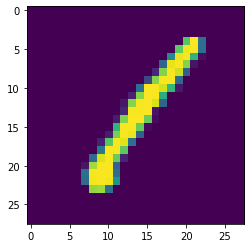

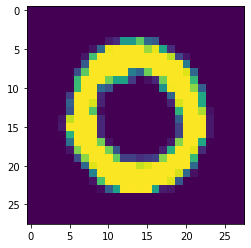

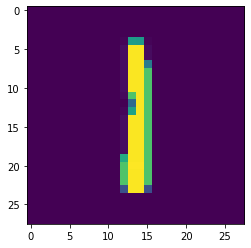

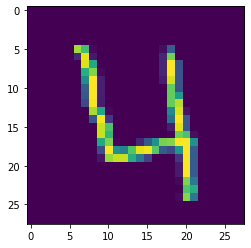

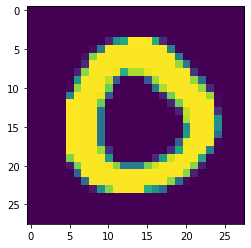

In [16]:
#imshow is used to visualize a matrix
for i in range(0,5):
    plt.imshow(x.iloc[i].values.reshape(28,28))
    plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='liblinear')

lor.fit(X_trains,y_train)
y_train_pred=lor.predict(X_trains)
y_train_prob=lor.predict_proba(X_trains)

y_test_pred=lor.predict(X_test)
y_test_prob=lor.predict_proba(X_test)

print('Train -Accuracy',accuracy_score(y_train,y_train_pred))
print('Train classification report','\n',classification_report(y_train,y_train_pred))

print('Test -Accuracy',accuracy_score(y_test,y_test_pred))
print('Test classification report','\n',classification_report(y_test,y_test_pred))

Train -Accuracy 0.9772789115646259
Train classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       702
           1       0.99      1.00      0.99       809
           2       0.98      0.98      0.98       744
           3       0.96      0.95      0.96       745
           4       0.99      0.99      0.99       671
           5       0.97      0.98      0.97       663
           6       0.99      1.00      1.00       739
           7       0.98      0.98      0.98       813
           8       0.96      0.95      0.95       697
           9       0.96      0.95      0.95       767

    accuracy                           0.98      7350
   macro avg       0.98      0.98      0.98      7350
weighted avg       0.98      0.98      0.98      7350

Test -Accuracy 0.7558730158730159
Test classification report 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       329
    

In [44]:
print(confusion_matrix(y_test,y_test_pred))

[[300   0   2   1   1   2   3   0  19   1]
 [  0 213   3   4   0   0   3   2 100   0]
 [  3   2 227   6   5   0   9   2  49   2]
 [  0   0   9 234   1   2   3   2  43  13]
 [  0   0   4   1 247   0   5   0  42  16]
 [ 11   1   4  25   4  57  12   1 150  16]
 [  2   1   1   1   2   0 296   0  13   0]
 [  1   0  11   5   8   0   1 241  28  24]
 [  1   0   0   1   2   1   4   0 309   2]
 [  1   0   0   7  10   0   1   3  54 257]]


### Evaluation Prediction model by using Princiapal Components

In [45]:
from sklearn.decomposition import PCA
pca=PCA()

pca.fit(X_trains)

PCA()

In [46]:
pca.explained_variance_

array([4.06105602e+01, 2.89597762e+01, 2.65818782e+01, 2.08410684e+01,
       1.86034529e+01, 1.55780914e+01, 1.42970496e+01, 1.28502258e+01,
       1.11540182e+01, 1.00000762e+01, 9.84643809e+00, 8.95066100e+00,
       8.12931471e+00, 7.82773761e+00, 7.65032336e+00, 7.14919712e+00,
       6.85018276e+00, 6.75394041e+00, 6.46623384e+00, 6.23273520e+00,
       5.93080364e+00, 5.83505617e+00, 5.61733296e+00, 5.42572377e+00,
       5.34768294e+00, 5.06032523e+00, 4.85477518e+00, 4.80535192e+00,
       4.55065768e+00, 4.50069898e+00, 4.43496002e+00, 4.40928678e+00,
       4.34098253e+00, 4.22951796e+00, 4.03856544e+00, 4.00804690e+00,
       3.90777604e+00, 3.85795608e+00, 3.76050541e+00, 3.67574660e+00,
       3.60466512e+00, 3.54361191e+00, 3.45257533e+00, 3.40217421e+00,
       3.36234682e+00, 3.28083080e+00, 3.17952494e+00, 3.15161287e+00,
       3.11952110e+00, 3.02031460e+00, 2.97928031e+00, 2.93640115e+00,
       2.90928789e+00, 2.88354439e+00, 2.75099796e+00, 2.71858669e+00,
      

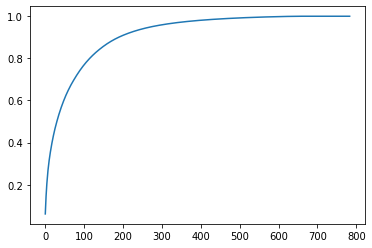

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [50]:
pc=0
for ev in np.cumsum(pca.explained_variance_ratio_):
    if(ev<0.99):
        pc+=1
    else:
        print(pc)
        break

477


In [53]:
pca=PCA(n_components=455)

X_train_pc=pca.fit_transform(X_trains)
X_test_pc=pca.transform(X_tests)

print(X_train_pc.shape,X_test_pc.shape)

(7350, 455) (3150, 455)


In [54]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='liblinear')

lor.fit(X_train_pc,y_train)
y_train_pred=lor.predict(X_train_pc)
y_train_prob=lor.predict_proba(X_train_pc)

y_test_pred=lor.predict(X_test_pc)
y_test_prob=lor.predict_proba(X_test_pc)

print('Train -Accuracy',accuracy_score(y_train,y_train_pred))
print('Train classification report','\n',classification_report(y_train,y_train_pred))

print('Test -Accuracy',accuracy_score(y_test,y_test_pred))
print('Test classification report','\n',classification_report(y_test,y_test_pred))

Train -Accuracy 0.9634013605442177
Train classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       702
           1       0.98      1.00      0.99       809
           2       0.97      0.95      0.96       744
           3       0.94      0.94      0.94       745
           4       0.98      0.98      0.98       671
           5       0.95      0.95      0.95       663
           6       0.98      0.99      0.98       739
           7       0.97      0.97      0.97       813
           8       0.95      0.92      0.93       697
           9       0.94      0.94      0.94       767

    accuracy                           0.96      7350
   macro avg       0.96      0.96      0.96      7350
weighted avg       0.96      0.96      0.96      7350

Test -Accuracy 0.873968253968254
Test classification report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       329
     

### Evaluation Prediction model by using Components(SVD)

In [56]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=783)
svd.fit(X_trains)

TruncatedSVD(n_components=783)

In [57]:
pc=0
for ev in np.cumsum(svd.explained_variance_ratio_):
    if(ev<0.99):
        pc+=1
    else:
        print(pc)
        break

477


In [58]:
svd=TruncatedSVD(n_components=477,random_state=4)

X_train_svd=svd.fit_transform(X_trains)
X_test_svd=svd.transform(X_tests)

print(X_train_svd.shape,X_test_svd.shape)

(7350, 477) (3150, 477)


In [60]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='liblinear')

lor.fit(X_train_svd,y_train)
y_train_pred=lor.predict(X_train_svd)
y_train_prob=lor.predict_proba(X_train_svd)

y_test_pred=lor.predict(X_test_svd)
y_test_prob=lor.predict_proba(X_test_svd)

print('Train -Accuracy',accuracy_score(y_train,y_train_pred))
print('Train classification report','\n',classification_report(y_train,y_train_pred))

print('Test -Accuracy',accuracy_score(y_test,y_test_pred))
print('Test classification report','\n',classification_report(y_test,y_test_pred))

Train -Accuracy 0.9659863945578231
Train classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       702
           1       0.98      1.00      0.99       809
           2       0.97      0.96      0.96       744
           3       0.94      0.94      0.94       745
           4       0.97      0.99      0.98       671
           5       0.96      0.96      0.96       663
           6       0.99      0.99      0.99       739
           7       0.97      0.97      0.97       813
           8       0.95      0.93      0.94       697
           9       0.94      0.94      0.94       767

    accuracy                           0.97      7350
   macro avg       0.97      0.97      0.97      7350
weighted avg       0.97      0.97      0.97      7350

Test -Accuracy 0.8749206349206349
Test classification report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       329
    